In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


**Competition Challenge And Goal**  
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.  
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges  to predict the final price of each home.
Goal of this work would be to do exploratory data analysis and understand about the data. 

**Data Explaination**  
The data consists of 81 columns in total. Excluding Id and SalePrice, there are 79 feature variables that can help to predict the house prices.
The total number of house enteries both in train and test data are (2919,80), where train data contains (1460,80) and test data contains (1459,79) enterie. The target variable (SalePrice) is excluded from test_data.    
The wide set of feature variables help to understand different aspects of while purchasing a house. We'll explore the data to understand which features play significant role that effects the price of a house, the positive and negative impact of minor details, relationships of features, trends and patterns that effect house pricing. 

**Read And Load Data**

In [2]:
train_data = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv",  index_col="Id")
test_data = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv",  index_col="Id")
# Merge the splits so we can process them together
df = pd.concat([train_data, test_data])
# set seed for reproducibility
np.random.seed(0) 

**Dataset Structure and Basic Understanding**

In this section we will explore the dataset structure and get a general overview about the data. We will see the quality of the data, understand the distrubtion of the data, how many numerical and categorical variables and missing values.

In [3]:
print("dataframe shape",df.shape)
print("train data shape",train_data.shape)
print("test data shape",test_data.shape)

dataframe shape (2919, 80)
train data shape (1460, 80)
test data shape (1459, 79)


In [4]:
df.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In total there are 37 numerical and 43 categorical variables. We can clearly see many columns are missing values. Sale Price has 1460 because its only in train data and not in test_data. The feature/predictor variables  roughly cover details such as area, neighborhood, garage, quality, design/features and year built information. 

We can see all  numerical predictor variables min-max range, mean and standard deviations and total count. We examine some of the common features looked   while determing the sale price of a house such as Lot Area, Overall Qaulity and Condition, Year Built and Sale Price.     
Sale Price :Max USD 75,5000 and min is USD34900. Mean of 180921, median of 163000, std 79442. Tells us that it is right skwed and not dispersed.   
Overall Qual: Max 10 and min 1, mean and median is 6 and std dev of 1.4. zero skewed and not dispered. 
Overall Cond: Max 9 and min 1, mean is 5.0 and median is 50 and std dev of 1. slight right skewed and not dispered.   
LotArea: Max 215245 and min 1300, mean is 10168 and median is 9453 and std dev of 7886.  right skewed and not dispered.   
YearBuilt: Max 2010 and min 1872, mean is 1972 and median is 1973 and std dev of 30.  left skewed and not dispered.   
TotalBsmtSF: Max 6110 and min 0, mean is 1051 and median is 989 and std dev of 440.  right skewed and not dispered.   




<AxesSubplot:>

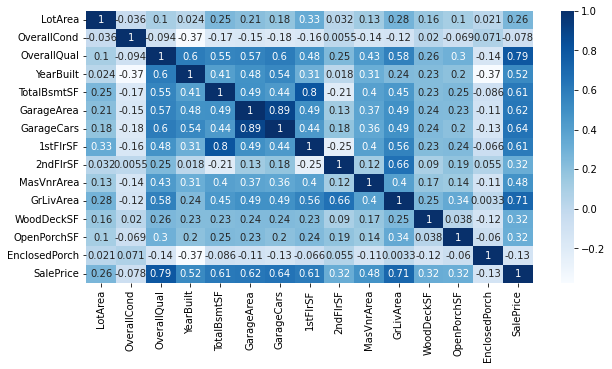

In [6]:
plt.figure(figsize=(10,5))
subsetdf=df[['LotArea','OverallCond',"OverallQual",'YearBuilt',
             "TotalBsmtSF","GarageArea","GarageCars","1stFlrSF","2ndFlrSF",
             "MasVnrArea","GrLivArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","SalePrice"]]
sns.heatmap(subsetdf.corr(),cbar=True,annot=True,cmap='Blues')


Correlating some numerical features from the heat map, for initial observation of relationships. 

**Missing Values Analysis**


In [7]:
#number of missing data points per column
missing_values_count = df.isnull().sum()
# print(missing_values_count)
# Percentage of missing values 
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print("percent_missing: ",percent_missing)  # 6.60% 


percent_missing:  6.6050017129153815


In [8]:
#sort the missing values series
sorted_missing_values_count = missing_values_count.sort_values(ascending=False)

#  all columns with at least one missing value
columns_with_no_na = df.dropna(axis=1)
columns_with_no_na.head()

# just how much columns did we lose?
columns_with_na= df.shape[1] - columns_with_no_na.shape[1]
print("Columns in original dataset: %d \n" % df.shape[1])
print("Columns with na's  %d" % columns_with_na)

#to cross check how many coloumns, we have at least one missing value
coloumn_missingvalues_count  = sorted_missing_values_count[sorted_missing_values_count != 0]
print("columns with missing values " , len(coloumn_missingvalues_count)) 
# there are 35 columns with na


Columns in original dataset: 80 

Columns with na's  35
columns with missing values  35


Sorting the dataframe based on missing value count, the first 35 column names are observered that have missing values. 

In [9]:
# Reviewing all the 19 columns and noting the count of missing values in each column. 
print(sorted_missing_values_count[0:35])
column_names_with_nv = sorted_missing_values_count[0:35].keys()
# df[column_names_with_nv]
#Getting all the rows where bsmtfintype2 is null.
# house_price_data.loc[house_price_data['BsmtFinType2'].isnull()]


PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageFinish     159
GarageQual       159
GarageYrBlt      159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
BsmtFullBath       2
Functional         2
Exterior2nd        1
Exterior1st        1
GarageArea         1
GarageCars         1
SaleType           1
KitchenQual        1
BsmtFinSF1         1
Electrical         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
dtype: int64


****Examination of features with missing values.****  
Seeing from the results it seems that PoolQC, MiscFeature, Alley, Fence, FirePlaceQu missing more than 50 % of the values. 
**PooLQC:** we can assume that not every house has pool avalaible in it and only few houses have a pool, thus we can easily replace the missing values with NA (no pool). 

Similarly MiscFeature, Alley, Fence, FireplaceQu missing values can be filled with NA as not every house would have these things.  
LotFrontage  As this is numerical and are values in feet, so the missing values can be replaced by the mean value. 
GarageFinish missing values with NA
GarageYrBlt, GarageCond, GarageFinish, GarageQual:  Missing values can be replaced with NA as it is assumed they are linked with garage type because if theres no garage then there can't be a value for these instances. 
BsmtFinType2, BsmtExposure, BsmtQual, BsmtFinType1       missing values with NA
MasVnrArea missing values in masonry vaneer area can be filled with 0.0. 
MasVnrType missing values can be filled with None. 
Electrical has one missing value, which can be replaced with NA(in this case Not avalibale.) - which can be changed after seeing the correlation with other features. 





Creating dictionaries for label encoding for category variables. 

In [10]:
#Oridinal Encoded dicts
# level 5 
ordinal_dict1={"NA":0, "Po":1, "Fa":2,"TA":3,"Gd":4,"Ex":5}
ordinal_lotshape={'IR3':0, 'IR2':1, 'IR1':2, 'Reg':3}
ordinal_masvnrtype={'None':0, 'BrkCmn':0, 'BrkFace':1, 'Stone':2}
ordinal_bsmtexp={'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}
ordinal_bsmtfintype={'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}
ordinal_centralair={'N':0, 'Y':1}
ordinal_functional={'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7}
ordinal_garagefinish={'NA':0, 'Unf':1, 'RFn':2, 'Fin':3}
ordinal_pavedrive={'N':0, 'P':1,'Y':2}
# ordinal_mszoning={'C (all)':'C','A':'A','RL':'RL', 'RM':'RM', 'FV':'FV', 'RH':'RH', 'I':"I"}


                

In [11]:
#Filling up Missing values with NA, None and 0. 

df=df.fillna({'PoolQC':'NA','MiscFeature':'NA','Alley':'NA','Fence':'NA', 'FireplaceQu':'NA'})
df = df.fillna({'LotFrontage': df['LotFrontage'].mean()})
df =df.fillna({'GarageYrBlt':'0', 'GarageCond':'NA','GarageType':"NA",
               "GarageQual":"NA",'GarageFinish':'NA',
              "GarageArea":0,"GarageCars":0})
df =df.fillna({
                'BsmtFinType2':'NA', 'BsmtExposure':'NA',
                'BsmtQual':'NA', 'BsmtCond':'NA', 'BsmtFinType1':'NA', 
                "BsmtHalfBath" : 0,   "BsmtFullBath":0,  
                "BsmtFinSF1": 0, "BsmtFinSF2":0, "BsmtUnfSF":0, 
                "TotalBsmtSF":0})

df = df.fillna({'MasVnrArea':0,'MasVnrType':"None", "MSZoning": "NA"  })

df = df.fillna({"Utilities":df['Utilities'].mode()[0],'Electrical':df['Electrical'].mode()[0]})

df = df.fillna({"Functional":df['Functional'].mode()[0],"Exterior2nd":df['Exterior2nd'].mode()[0],
                "Exterior1st":df['Exterior1st'].mode()[0], "SaleType":df['SaleType'].mode()[0], 
                "KitchenQual":"NA" })



np.sort(df.columns)
# df[column_names_with_nv].isnull().sum()
#Check to confirm data is free from missing values.
#The missing values are filled. 
# complete_house_price_data = complete_house_pri/ce_data.drop(columns=['Id'])

array(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces',
       'Foundation', 'FullBath', 'Functional', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenAbvGr', 'KitchenQual', 'LandContour',
       'LandSlope', 'LotArea', 'LotConfig', 'LotFrontage', 'LotShape',
       'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea',
       'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold', 'Neighborhood',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive',
       'PoolArea', 'P

We will Analyze the  relevant columns relationships, and we'll convert the data into label, ordinal and one-hot encoding.  
Variables Categorization with help of data description.   
Floors - LowQualFinSF, 1stFlrSF, 2ndFlrSF,   
Porch - OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch  
Rooms Above Grade - BedroomAbvGr, TotRmsAbvGrd
Basement - BsmtFinType2,BsmtExposure,BsmtQual,BsmtCond,BsmtFinType1,BsmtHalfBath,BsmtFullBath,  
           BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF  
Bath - HalfBath, FullBath  
Living Area - GrLivArea  
Kitchen - KitchenQual, KitchenAbvGr,   
Garage - GarageYrBlt,GarageCond,GarageType,GarageQual,'GarageFinish,GarageArea,"GarageCars,
Location -  Neighborhood, Street, Condition1,Condition2
Heating/Cooling - CentralAir, Heating, HeatingQC. 
Pool - PoolQC, PoolArea
Building - BldgType  
Overall - OverallQual, OverallCond
Fence - Fence
FirePlace - FireplaceQu, Fireplaces
Structure - Exterior1st, Exterior2nd,
Property - LandSlope, LotConfig, LandContour, LotShape, Alley, LotSize, LotFrontage
Style - MSSubClass, HouseStyle 

In [12]:
#Check category features. 
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2003.0,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
2,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,1976.0,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
3,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2001.0,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
4,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,1998.0,Unf,TA,TA,Y,NA,NA,NA,WD,Abnorml
5,RL,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,2000.0,RFn,TA,TA,Y,NA,NA,NA,WD,Normal


Object columns to be converted to categorical.  
MSZoning, Alley, LandContour, street, LotConfig, LandSlope,Neighborhood, Condition1 
Condition2, BldgType, HouseStyle,RoofStyle, RoofMatl, Exterior1s, Exterior2nd,  
Heating, Electrical, GarageType, GarageYrBlt, Fence, MiscFeature,  SaleType, SaleCondition  
Ordinal Label   
LotShape (0,1,2,3)  
Utilities (AllPub except 1)
MasVnrType  
ExterQual, ExterCond  
BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
HeatingQC, CentralAir  
KitchenQual, Functional, FireplaceQu  
GarageFinish', 'GarageQual', 'GarageCond
PavedDrive  
PoolQC

Converting data into ordinal and label encoding

In [13]:
df['LotShape']=df['LotShape'].map(ordinal_lotshape).copy()
df['MasVnrType']=df['MasVnrType'].map(ordinal_masvnrtype).copy()
df['ExterQual']=df['ExterQual'].map(ordinal_dict1).copy()
df['ExterCond']=df['ExterCond'].map(ordinal_dict1).copy()
df['BsmtQual']=df['BsmtQual'].map(ordinal_dict1).copy()
df['BsmtCond']=df['BsmtCond'].map(ordinal_dict1).copy()
df['BsmtExposure']=df['BsmtExposure'].map(ordinal_bsmtexp).copy()
df['BsmtFinType1']=df['BsmtFinType1'].map(ordinal_bsmtfintype).copy()
df['BsmtFinType2']=df['BsmtFinType2'].map(ordinal_bsmtfintype).copy()
df['HeatingQC']=df['HeatingQC'].map(ordinal_dict1).copy()
df['CentralAir']=df['CentralAir'].map(ordinal_dict1).copy()
df['KitchenQual']=df['KitchenQual'].map(ordinal_dict1).copy()
df['Functional']=df['Functional'].map(ordinal_functional).copy()
df['FireplaceQu']=df['FireplaceQu'].map(ordinal_dict1).copy()
df['GarageFinish']=df['GarageFinish'].map(ordinal_garagefinish).copy()
df['GarageQual']=df['GarageQual'].map(ordinal_dict1).copy()
df['GarageCond']=df['GarageCond'].map(ordinal_dict1).copy()
df['PavedDrive']=df['PavedDrive'].map(ordinal_pavedrive).copy()
df['PoolQC']=df['PoolQC'].map(ordinal_dict1).copy()



In [14]:
df['MSZoning']=df['MSZoning'].astype("category")


df['Street']=df['Street'].astype("category")
df['Alley']=df['Alley'].astype("category")
df['LandContour']=df['LandContour'].astype("category")
df['LotConfig']=df['LotConfig'].astype("category")
df['LandSlope']=df['LandSlope'].astype("category")
df['Neighborhood']=df['Neighborhood'].astype("category")
df['Condition1']=df['Condition1'].astype("category")
df['Condition2']=df['Condition2'].astype("category")
df['Foundation']=df['Foundation'].astype("category")
df['BldgType']=df['BldgType'].astype("category")
df['HouseStyle']=df['HouseStyle'].astype("category")
df['RoofStyle']=df['RoofStyle'].astype("category")
df['RoofMatl']=df['RoofMatl'].astype("category")
df['Exterior1st']=df['Exterior1st'].astype("category")
df['Exterior2nd']=df['Exterior2nd'].astype("category")
df['Heating']=df['Heating'].astype("category")
df['Electrical']=df['Electrical'].astype("category")
df['GarageType']=df['GarageType'].astype("category")
df['GarageYrBlt']=df['GarageYrBlt'].astype('int')
df['Fence']=df['Fence'].astype("category")
df['MiscFeature']=df['MiscFeature'].astype("category")
df['SaleType']=df['SaleType'].astype("category")
df['SaleCondition']=df['SaleCondition'].astype("category")
df['MoSold']=df['MoSold'].astype("category")
df['YrSold']=df['YrSold'].astype("category")
df['MSSubClass']=df['MSSubClass'].astype("category")



In [15]:
# Checking garage year built and GarageCond having 0 as values against related features. 
sub_g=df.loc[df['GarageYrBlt']==0].copy()
sub_g[['GarageYrBlt','YearBuilt','YrSold','GarageCars', 'GarageArea', 'GarageType', 'GarageCond', 'GarageQual', 'GarageFinish']].head()

,GarageYrBlt,YearBuilt,YrSold,GarageCars,GarageArea,GarageType,GarageCond,GarageQual,GarageFinish
Id,,,,,,,,,
40,0,1955,2008,0.0,0.0,NA,0,0,0
49,0,1920,2009,0.0,0.0,NA,0,0,0
79,0,1968,2010,0.0,0.0,NA,0,0,0
89,0,1915,2009,0.0,0.0,NA,0,0,0
90,0,1994,2007,0.0,0.0,NA,0,0,0


It is seen that where GarageYrBlt and GarageCond have missing values or 0, the garage was not built at all. Some outliers were seen where the dates are 2207 which is not possible.

In [16]:
#checking the cardinality of the categorical variables. 
obj_df=df.select_dtypes(include=['category']).copy()
object_cols=obj_df.columns
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: df[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('Street', 2),
 ('Alley', 3),
 ('LandSlope', 3),
 ('LandContour', 4),
 ('LotConfig', 5),
 ('BldgType', 5),
 ('Electrical', 5),
 ('Fence', 5),
 ('MiscFeature', 5),
 ('YrSold', 5),
 ('MSZoning', 6),
 ('RoofStyle', 6),
 ('Foundation', 6),
 ('Heating', 6),
 ('SaleCondition', 6),
 ('GarageType', 7),
 ('Condition2', 8),
 ('HouseStyle', 8),
 ('RoofMatl', 8),
 ('Condition1', 9),
 ('SaleType', 9),
 ('MoSold', 12),
 ('Exterior1st', 15),
 ('MSSubClass', 16),
 ('Exterior2nd', 16),
 ('Neighborhood', 25)]

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

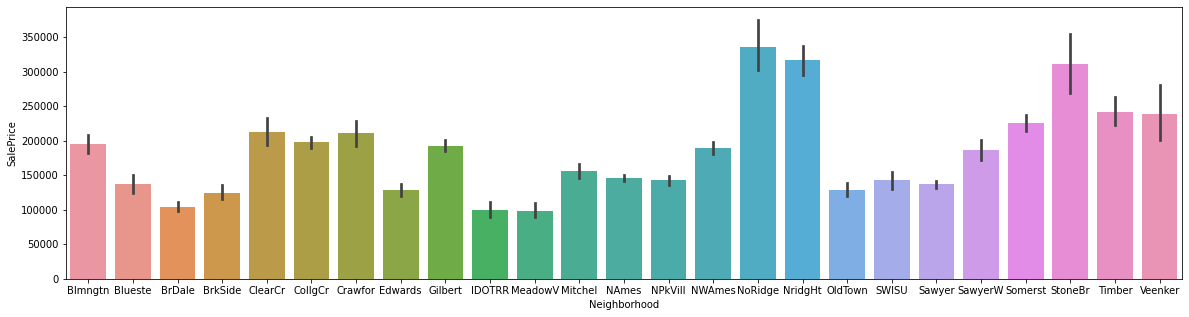

In [17]:
# Checking distribution of SalePrice with respect to neighborhood
plt.figure(figsize=(20,5))

sns.barplot(df['Neighborhood'],df['SalePrice'])
# sns.histplot(x=df['Neighborhood'],y=df['SalePrice'])

It can be seen that neighborhoods such as NoRigde, NrighHt, StoneBr have the highest saleprice. 
We can further see what time of features the homes in these locations have to understand their high price. 

**Visualzation**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

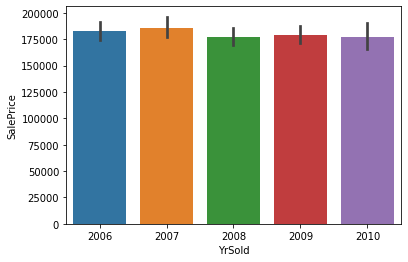

In [18]:
#Sale Price Per Year Sold
sns.barplot(df["YrSold"],df['SalePrice'])

CLEAN BOTH TRAIN AND TEST DATA 

In [19]:
# df_train = df.loc[train_data.index, :]
# df_test = df.loc[test_data.index, :]
# print(df_train.shape,df_test.shape)

Seleting columns based on intution and relevancy with sale price. 
 LotArea , Street , Utilities, Neighborhood, BldgType , HouseStyle, OverallQual,
 OverallCond, YearBuilt, ExterQual, ExterCond, Foundation, BsmtCond, TotalBsmtSF,
 Heating, HeatingQC, CentralAir, Electrical, 'BedroomAbvGr', 'KitchenAbvGr', GarageType, GarageArea, PoolQC, YrSold, SaleType,SaleCondition, SalePrice

In [20]:

subset_df1=df[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd','SalePrice']]

subset_df2=df[['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','SalePrice']]
subset_df3=df[['Heating','HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd','SalePrice']]
subset_df4=df[['Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC','SalePrice']]
subset_df5=df[['Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition','SalePrice']]


<AxesSubplot:>

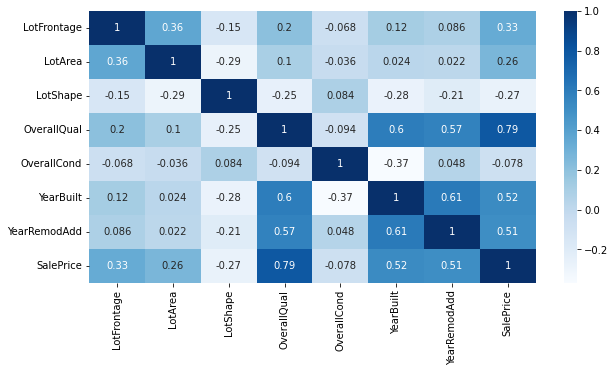

In [21]:
# subset_df1.corr()
plt.figure(figsize=(10,5))
sns.heatmap(subset_df1.corr(),cbar=True,annot=True,cmap='Blues')


Year built, Overall Quality have strong relationship with price value. 

<AxesSubplot:>

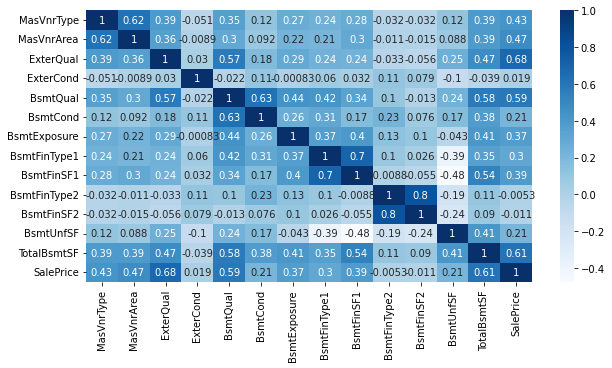

In [22]:
plt.figure(figsize=(10,5))
sns.heatmap(subset_df2.corr(),cbar=True,annot=True,cmap='Blues')


Exterior Quality, Basement Quality, Total basement surface area have high correlation with sale price. 

<AxesSubplot:>

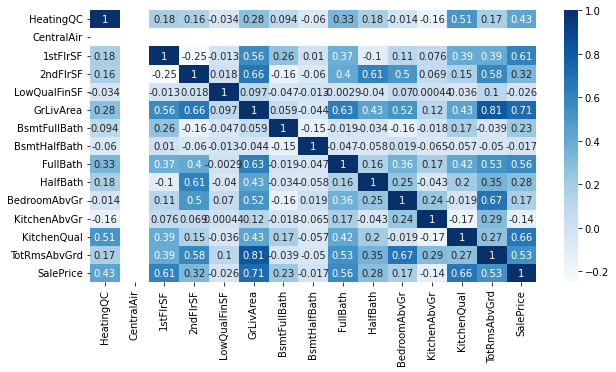

In [23]:
plt.figure(figsize=(10,5))
sns.heatmap(subset_df3.corr(),cbar=True,annot=True,cmap='Blues')


Above Grade living area, kitchen Quality, total rooms above grade and sqaure surface have high correlation with sale price. 

<AxesSubplot:>

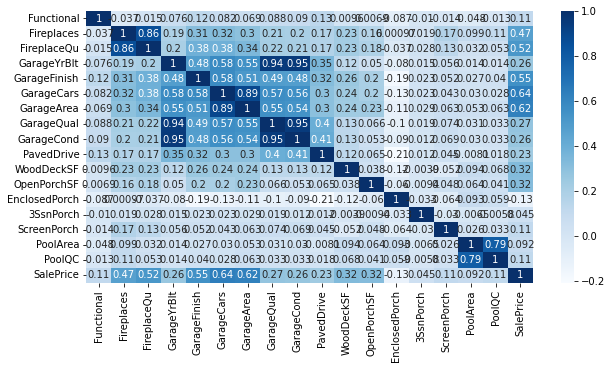

In [24]:
plt.figure(figsize=(10,5))
sns.heatmap(subset_df4.corr(),cbar=True,annot=True,cmap='Blues')


Garage Area, Finish, Space for cars Fire place also have high correlation with sale price. 

Mutual Information

OverQual has highest relation with price. The important goes less inthe order of Living area, 
Year Built, Basement, Kitchen, Garage, Rooms, Fireplace and Heating. 

Seeing the importance of feature through random forest we can confirm the same order of importance for saleprice with feature where overall quality has a huge impact on the sale price. 